# Теоретические вопросы
## Привести по 2 примера, когда лучше максимизировать Precision, а когда Recall?
**Ответ:**
* Precision:
    1. Когда нам важнее точно определять основной класс и не допускать ошибки второго класса.
    2. Не пропускать злоумышленников на сервис, более углубленно проверяя ошибки первого рода, на принадлежность к основному классу.


* Recall:
    1. Когда нам важнее как можно больше в количестве определять основной класс и уменьшать количество ошибок первого рода.
    2. Определять что на фотографии лицо человека, даже если будет распознано не лицо.

## Почему мы используем F-меру, почему, например, нельзя просто взять среднее от Precision и Recall?
**Ответ:** Мы используем F-score, для возможности балансировки Precision и Recall, с помощью коефицента 𝛽.

# Подготовка кусового датасета

### Описание датасета 
**подпункты с описанием добавленных столбцов после подготовки**


* **Home Ownership** - домовладение
* **Annual Income** - годовой доход
        
        1. Annual Income upd.2 - пропуски заполены мединой
        
* **Years in current job** - количество лет на текущем месте работы

        1. upd2 - замененные на числовые значения и заполненные модой
        2. дамми переменные заполненные модой
        
* **Tax Liens** - налоговые обременения
* **Number of Open Accounts** - количество открытых счетов
* **Years of Credit History** - количество лет кредитной истории
* **Maximum Open Credit** - наибольший открытый кредит
* **Number of Credit Problems** - количество проблем с кредитом
* **Months since last delinquent** - количество месяцев с последней просрочки платежа
* **Bankruptcies** - банкротства
        
        1. upd.2 - пропуски заполены модой
        
* **Purpose** - цель кредита
        
        1. разложен на дамми переменные
  
* **Term** - срок кредита
        
        1. разложен на дамми переменные
  
* **Current Loan Amount** - текущая сумма кредита
        
        1. ver.2 - выбросы заполены медианой
        
* **Current Credit Balance** - текущий кредитный баланс
* **Monthly Debt** - ежемесячный долг
* **Credit Default** - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)
* **Credit Score** - кредитные очки
        
        1. ver.2 - убраны выбросы и заполнены пропуски с помощью модели
        2. ver.3 - убраны выбросы и заполнены пропуски медианой

In [309]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV

import sklearn

In [344]:
PATH_COURSE_PROJECT_DATASET_TRAIN = 'course_project/course_project_train.csv'
PATH_COURSE_PROJECT_DATASET_TEST = 'course_project/course_project_test.csv'

PATH_COURSE_PROJECT_DATASET_TRAIN_PREP = 'course_project/course_project_train_prep.csv'
PATH_COURSE_PROJECT_DATASET_TEST_PREP = 'course_project/course_project_test_prep.csv'

# Загрузка данных

In [311]:
df = pd.read_csv(PATH_COURSE_PROJECT_DATASET_TRAIN)
df_test = pd.read_csv(PATH_COURSE_PROJECT_DATASET_TEST)

In [312]:
df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


# Первичный осмотр данных

In [313]:
df.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

## Обзор не числовых переменных

In [315]:
df_object_features_list = df.select_dtypes('object').columns.tolist()

In [316]:
for obj_col in df_object_features_list:
    print(df[obj_col].value_counts(), '\n\n', '*' * 100, '\n')

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64 

 **************************************************************************************************** 

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64 

 **************************************************************************************************** 

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   8
renewable energy    

### Разложим на дамми переменные те столбцы где все данные уже есть

In [318]:
df = pd.concat([df, pd.get_dummies(df[['Term', 'Purpose', 'Home Ownership']], drop_first=True)], axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df_test[['Term', 'Purpose', 'Home Ownership']], drop_first=True)],  axis=1)

Добавим столбец в каждый из датафраймов в случае если в одном из них не будет того же элемента Pupose что и в другом

In [319]:
Purpose_add_col_test = set(df["Purpose"].unique()) - set(df_test["Purpose"].unique())
for i in Purpose_add_col_test:
    df_test = pd.concat([df_test, pd.DataFrame([0]*len(df_test), columns=[i])], axis=1)
        
Purpose_add_col_train = set(df_test["Purpose"].unique()) - set(df["Purpose"].unique())
for i in Purpose_add_col_train:
    df = pd.concat([df, pd.DataFrame([0]*len(df), columns=[i])], axis=1)

# Изменение данных

## Восполнение пропусков

###  Есть ли признаки коорелирующие друг с другом более чем на 0.95?

In [320]:
corr_df = df.corr()
bool = (corr_df.values != 1) & (corr_df.values > 0.95)
corr_df.loc[bool, corr_df[bool].index.tolist()]

""


### Annual Income

<AxesSubplot:xlabel='Annual Income', ylabel='Count'>

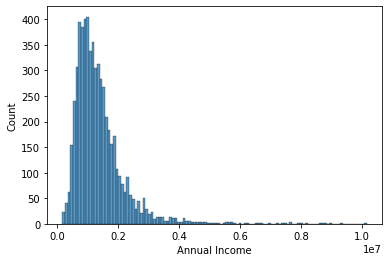

In [321]:
sns.histplot(df['Annual Income'])

In [322]:
df['Annual Income upd.2'] = df['Annual Income']
df['Annual Income upd.2'].fillna(df['Annual Income'].median(), inplace=True)

df_test['Annual Income upd.2'] = df_test['Annual Income']
df_test['Annual Income upd.2'].fillna(df['Annual Income'].median(), inplace=True)

### Years in current job

Заменяем объектные признаки на числовые в новом столбце

In [323]:
for dataset in [df, df_test]:
    dataset['Years in current job upd.2'] = dataset['Years in current job']
    for i in dataset['Years in current job upd.2'].value_counts().index.to_list():    
        if i[:2] == '10':
            dataset.loc[dataset['Years in current job upd.2'] == i, 'Years in current job upd.2'] = 10
        elif i[0] == '<':
            dataset.loc[dataset['Years in current job upd.2'] == i, 'Years in current job upd.2'] = 0
        else:
            dataset.loc[dataset['Years in current job upd.2'] == i, 'Years in current job upd.2'] = i[0]

Заполняем пустые значения модой в старом и новом столбцах

In [324]:
df['Years in current job upd.2'].fillna(df['Years in current job upd.2'].mode()[0], inplace=True)
df_test['Years in current job upd.2'].fillna(df['Years in current job upd.2'].mode()[0], inplace=True)

df['Years in current job'].fillna(df['Years in current job'].mode()[0], inplace=True)
df_test['Years in current job'].fillna(df['Years in current job'].mode()[0], inplace=True)

Изменяем тип нового столбца на int64

In [325]:
df['Years in current job upd.2'] = df['Years in current job upd.2'].astype('int64')
df_test['Years in current job upd.2'] = df_test['Years in current job upd.2'].astype('int64')

Раскладываем на дамми переменные старый столбец

In [326]:
df = pd.concat([df, pd.get_dummies(df[['Years in current job']], drop_first=True)], axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df_test[['Years in current job']], drop_first=True)], axis=1)

### Bankruptcies

In [327]:
df['Bankruptcies upd.2'] = df['Bankruptcies']
df['Bankruptcies upd.2'].fillna(df['Bankruptcies upd.2'].mode()[0], inplace=True)

df_test['Bankruptcies upd.2'] = df_test['Bankruptcies']
df_test['Bankruptcies upd.2'].fillna(df['Bankruptcies upd.2'].mode()[0], inplace=True)

### [Credit Score](http://localhost:8888/notebooks/Homework/PythonForDS_2/lesson1.ipynb#Credit-Score-ver.2-(заполнение-пропусков))
в виде функции для использования после оброботки выбросов

In [ ]:
def credit_score_fillna(df, df_test):
    parameters = {
        'n_estimators': [350],
        'max_features': [5, 6, 7],
        'max_depth': 15,
        'random_state': [11]
    }

    model_RFR_for_Credit_Score = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid=parameters,
        scoring='r2',
        cv=5,
    )

    features_list_to_fill_Credit_Score = [
        'Annual Income upd.2',
        'Years in current job upd.2',
        'Tax Liens',
        'Years of Credit History',
        'Maximum Open Credit',
        'Number of Credit Problems',
        'Bankruptcies upd.2',
        'Term_Short Term',
        'Purpose_buy a car',
        'Purpose_buy house',
        'Purpose_debt consolidation',
        'Purpose_educational expenses',
        'Purpose_home improvements',
        'Purpose_major purchase',
        'Purpose_medical bills',
        'Purpose_moving',
        'Purpose_other',
        'Purpose_renewable energy',
        'Purpose_small business',
        'Purpose_take a trip',
        'Purpose_vacation',
        'Purpose_wedding',
        'Home Ownership_Home Mortgage',
        'Home Ownership_Own Home',
        'Home Ownership_Rent',
        'Current Loan Amount ver.2',
        'Current Credit Balance',
        'Monthly Debt'
    ]


    model_RFR_for_Credit_Score.fit(
            df.loc[df['Credit Score ver.2'].notnull(), features_list_to_fill_Credit_Score],
            df.loc[df['Credit Score ver.2'].notnull(), 'Credit Score ver.2']
        )

    for dataset in [df, df_test]:
        Credit_Score_predict = model_RFR_for_Credit_Score.predict(
            dataset.loc[dataset['Credit Score ver.2'].isnull(), features_list_to_fill_Credit_Score]
        )

        dataset.loc[dataset['Credit Score ver.2'].isnull(), 'Credit Score ver.2'] = Credit_Score_predict


    return df, df_test
    

## Обработка выбросов

### Credit Score

In [329]:
credit_score_err = df['Credit Score'].loc[(df['Credit Score'] != 0) & ((df['Credit Score'] <= 350) | (df['Credit Score'] >= 850))]
credit_score_err.head()

69     6470.0
87     7440.0
94     7010.0
96     7320.0
116    7390.0
Name: Credit Score, dtype: float64

In [330]:
print(max(credit_score_err))
min(credit_score_err)

7510.0


6060.0

###  Можно предположить, что ошибочные данные в credit_score были занесены в него с добовлением лишнего разряда

In [331]:
credit_score_err[credit_score_err % 10 != 0]

Series([], Name: Credit Score, dtype: float64)

### проверяем теорию на тестовых данных

In [332]:
credit_score_err_test = df_test['Credit Score'].loc[(df_test['Credit Score'] != 0) & ((df_test['Credit Score'] <= 350) | (df_test['Credit Score'] >= 850))]

print(f"max - {max(credit_score_err)}")
print(f"min - {min(credit_score_err)}")

print('\n\nЭлементы с остатком от деления на 10 не равному 0:')
credit_score_err_test[credit_score_err_test % 10 != 0]

max - 7510.0
min - 6060.0


Элементы с остатком от деления на 10 не равному 0:


Series([], Name: Credit Score, dtype: float64)

### добавляем столбец с изменнёнными данными

In [333]:
df['Credit Score ver.2'] = df['Credit Score'] 

df.loc[(df['Credit Score ver.2'] != 0) & 
                       ((df['Credit Score ver.2'] <= 350) | 
                        (df['Credit Score ver.2'] >= 850)), 
       ['Credit Score ver.2']] = credit_score_err[credit_score_err % 10 != 0]



df_test['Credit Score ver.2'] = df_test['Credit Score'] 

df_test.loc[(df_test['Credit Score ver.2'] != 0) & 
                       ((df_test['Credit Score ver.2'] <= 350) | 
                        (df_test['Credit Score ver.2'] >= 850)), 
            ['Credit Score ver.2']] = credit_score_err_test[credit_score_err_test % 10 != 0]

## Credit Score ver.3

In [334]:
df['Credit Score ver.3'] = df['Credit Score ver.2'].fillna(df['Credit Score ver.2'].median())
df_test['Credit Score ver.3'] = df_test['Credit Score ver.2'].fillna(df['Credit Score ver.2'].median())

### Current Loan Amount

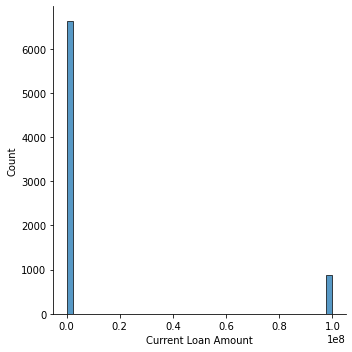

In [335]:
sns.displot(df['Current Loan Amount'], bins=40)
plt.show()

<AxesSubplot:xlabel='Current Loan Amount', ylabel='Count'>

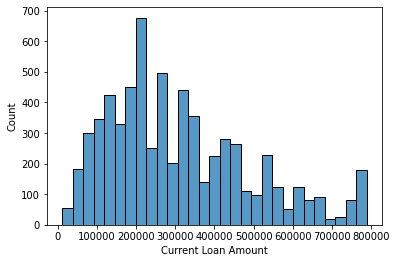

In [336]:
sns.histplot(df['Current Loan Amount'][df['Current Loan Amount'] != 99999999.0])

In [337]:
max(df['Current Loan Amount'][df['Current Loan Amount'] != 99999999.0])

789030.0

### добавляем столбец с изменнёнными данными

In [338]:
df['Current Loan Amount ver.2'] = df['Current Loan Amount']
df.loc[df['Current Loan Amount ver.2'] == 99999999.0, 'Current Loan Amount ver.2'] = df['Current Loan Amount'].median()

df_test['Current Loan Amount ver.2'] = df_test['Current Loan Amount']
df_test.loc[df_test['Current Loan Amount ver.2'] == 99999999.0, 'Current Loan Amount ver.2'] = df['Current Loan Amount'].median()

## [Credit Score ver.2 (заполнение пропусков)](http://localhost:8888/notebooks/Homework/PythonForDS_2/lesson1.ipynb#Credit-Score)

In [ ]:
df, df_test = credit_score_fillna(df=df, df_test=df_test)

In [345]:
df.to_csv(PATH_COURSE_PROJECT_DATASET_TRAIN_PREP)
df_test.to_csv(PATH_COURSE_PROJECT_DATASET_TEST_PREP)